In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import NB_Funcs as hlp
import seaborn as sns

In [2]:
def pickle_save(filename, data):
    with open(filename,'wb') as _save:
        pickle.dump(data,_save)
    
def pickle_load(filename):
    with open(filename,'rb') as _load:
        var = pickle.load(_load)
    return var

def best_score(model, featureSet):
    model.equations_['feature_set'] = featureSet
    ind = model.equations_['score'].idxmax()
    df = model.equations_.iloc[ind]
    return df

In [4]:
VIN_DF = pickle_load("../Data/Train_Test/VIN_PreprocessedData")
N_N = np.load('../Data/RawData/VIN/VIN_N_curves.npy')

$M(x) = R(0) + \nu*N(0, x)$

# $\frac{dN}{dt*N} = r*(M - \nu*N)$

# $\frac{dR}{dt} = -\nu*\frac{dN}{dt}$

$r = 0.5, \nu = 2*10^{-7}$

# Feature Set 1: N

In [26]:
fs1 = pickle_load("../Data/ModelOutputs/VIN_FS1.pkl"); fs1E = best_score(fs1,1); fs1E['sympy_format']

0.49672112 - 9.780495e-8*Pop

In [27]:
fs1MB = fs1.get_best(); fs1MB['sympy_format']

(0.49393287 - 9.751274e-8*Pop)*exp(9.4270005e-9*Pop)

In [28]:
fs1E["Features"] = r"$N$"; fs1MB["Features"] = r"$N$"

/run/nvme/job_17140036/tmp/ipykernel_1356175/1373657259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs1E["Features"] = r"$N$"; fs1MB["Features"] = r"$N$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/1373657259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs1E["Features"] = r"$N$"; fs1MB["Features"] = r"$N$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/1373657259.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs1E["F

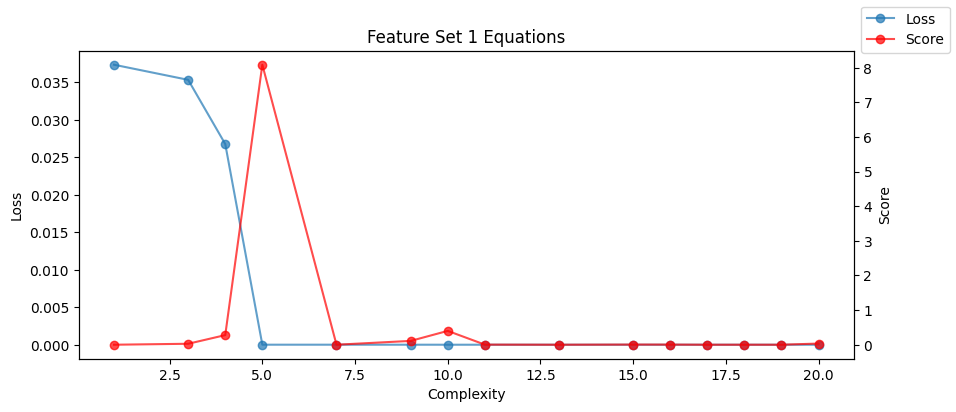

In [29]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs1.equations_['complexity'],fs1.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 1 Equations")
axT = ax.twinx()
axT.plot(fs1.equations_['complexity'],fs1.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Feature Set 2: N, Ring

In [30]:
fs2 = pickle_load("../Data/ModelOutputs/VIN_FS2.pkl"); fs2E = best_score(fs2,2); fs2E['sympy_format']

0.49672097 - 9.780499e-8*Pop

In [31]:
fs2MB = fs2.get_best(); fs2MB['sympy_format']

-6.79064e-8*(1.3528359e-8*Pop + 1.3685237)*(Pop - 2498.05651203364*Ring) + 0.4925823

In [32]:
fs2E["Features"] = r"$N$"; fs2MB["Features"] = r"$N,Ring$"

/run/nvme/job_17140036/tmp/ipykernel_1356175/2138785188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs2E["Features"] = r"$N$"; fs2MB["Features"] = r"$N,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/2138785188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs2E["Features"] = r"$N$"; fs2MB["Features"] = r"$N,Ring$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/2138785188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

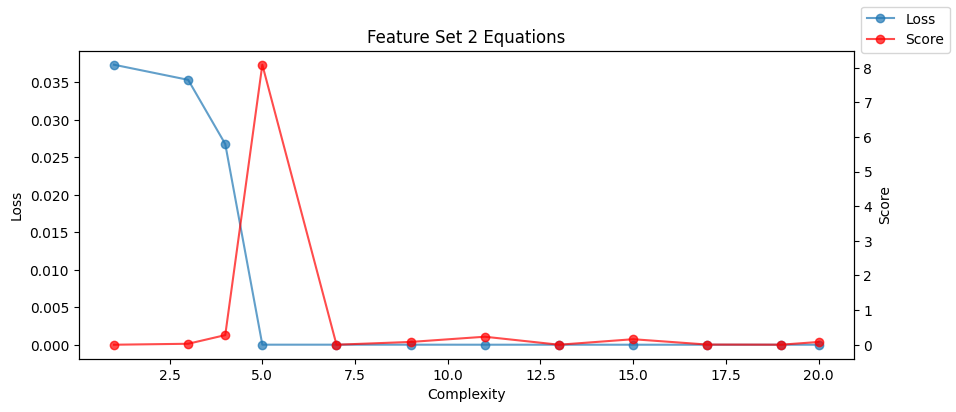

In [33]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs2.equations_['complexity'],fs2.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 2 Equations")
axT = ax.twinx()
axT.plot(fs2.equations_['complexity'],fs2.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Feature Set 3: N, N_0

In [34]:
fs3 = pickle_load("../Data/ModelOutputs/VIN_FS3.pkl"); fs3E = best_score(fs3,3); fs3E['sympy_format']

0.49672318 - 9.7805675e-8*Pop

In [35]:
fs3MB = fs3.get_best(); fs3MB['sympy_format']

(1.15321676e-7*N_init - 1.15321676e-7*Pop + 0.576647158989336)/(1.182288416 - 1.14192039938839e-8*Pop)

In [36]:
fs3HP = fs3.get_best(4); fs3HP['sympy_format']

9.91964969296959e-8*N_init - 9.788626e-8*Pop + 0.49066588

In [37]:
fs3E["Features"] = r"$N$"; fs3MB["Features"] = r"$N,N_0$"; fs3HP["Features"] = r"$N,N_0$"

/run/nvme/job_17140036/tmp/ipykernel_1356175/1701700922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs3E["Features"] = r"$N$"; fs3MB["Features"] = r"$N,N_0$"; fs3HP["Features"] = r"$N,N_0$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/1701700922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs3E["Features"] = r"$N$"; fs3MB["Features"] = r"$N,N_0$"; fs3HP["Features"] = r"$N,N_0$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/1701700922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

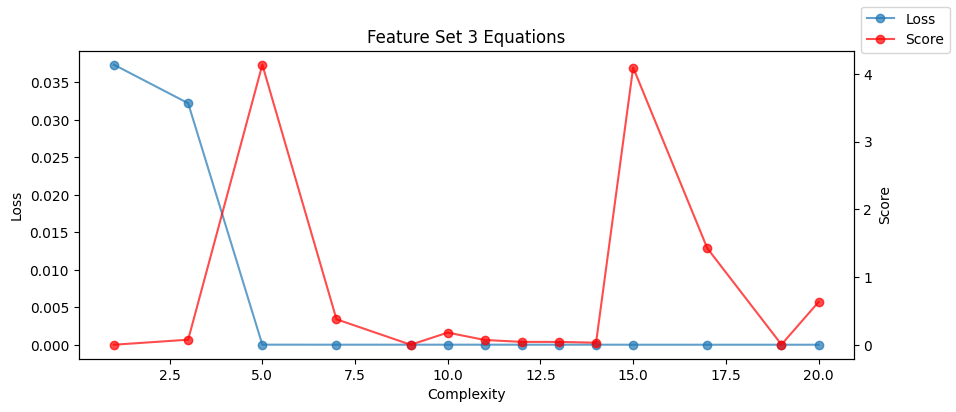

In [38]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs3.equations_['complexity'],fs3.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 3 Equations")
axT = ax.twinx()
axT.plot(fs3.equations_['complexity'],fs3.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

# Feature Set 4: N, N_bar

In [39]:
fs4 = pickle_load("../Data/ModelOutputs/VIN_FS4.pkl"); fs4E = best_score(fs4,4); fs4E['sympy_format']

0.49672192 - 9.780499e-8*Pop

In [40]:
fs4MB = fs4.get_best(); fs4MB['sympy_format']

-9.275573e-8*Pop*exp(9.840981e-9*Pop) + 0.49384436

In [41]:
fs4E["Features"] = r"$N$"; fs4MB["Features"] = r"$N$"

/run/nvme/job_17140036/tmp/ipykernel_1356175/2286898223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs4E["Features"] = r"$N$"; fs4MB["Features"] = r"$N$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/2286898223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs4E["Features"] = r"$N$"; fs4MB["Features"] = r"$N$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/2286898223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fs4E["F

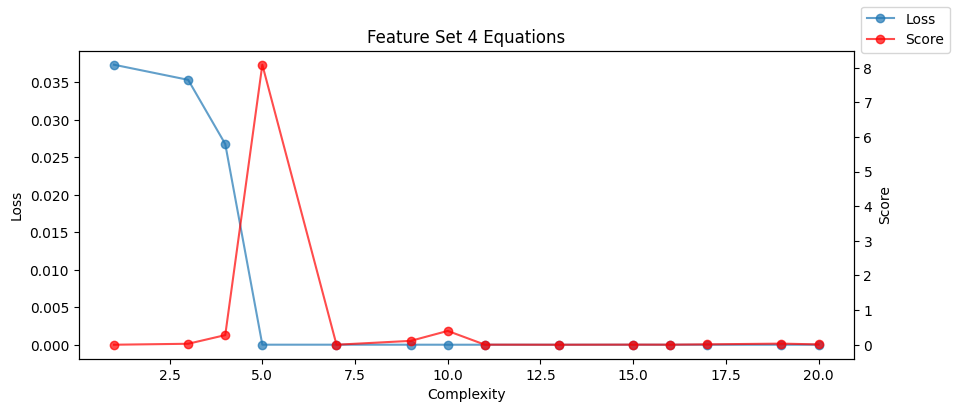

In [42]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fs4.equations_['complexity'],fs4.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("Feature Set 4 Equations")
axT = ax.twinx()
axT.plot(fs4.equations_['complexity'],fs4.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

### None of the feature sets so far use more than N and N_0. Can reason that these are the only 2 important features. Let's try a top down approach to see if any of the cumulative ones play a role. If they show, we will repeat the process with N_C

# Top Down: All Features

In [43]:
fsTD = pickle_load("../Data/ModelOutputs/VIN_TD.pkl"); fsTDE = best_score(fsTD,100); fsTDE['sympy_format']

1.98211389710321/(3.59476959961642*exp(1.02374585e-7*Cum_N) + 0.46444735)

In [44]:
fsTDMB = fsTD.get_best(); fsTDMB['sympy_format']

1.98211389710321/(3.59476959961642*exp(1.02374585e-7*Cum_N) + 0.46096718 + 188.387062095482/N_init)

In [45]:
fsTDHP = fsTD.get_best(3); fsTDHP['sympy_format']

0.491061*exp(-9.646018e-8*Cum_N)

In [46]:
fsTDE["Features"] = r"$N_C$"; fsTDMB["Features"] = r"$N_C, N_0$"; fsTDHP["Features"] = r"$N_C$"

/run/nvme/job_17140036/tmp/ipykernel_1356175/3889185276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsTDE["Features"] = r"$N_C$"; fsTDMB["Features"] = r"$N_C, N_0$"; fsTDHP["Features"] = r"$N_C$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/3889185276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fsTDE["Features"] = r"$N_C$"; fsTDMB["Features"] = r"$N_C, N_0$"; fsTDHP["Features"] = r"$N_C$"
/run/nvme/job_17140036/tmp/ipykernel_1356175/3889185276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/

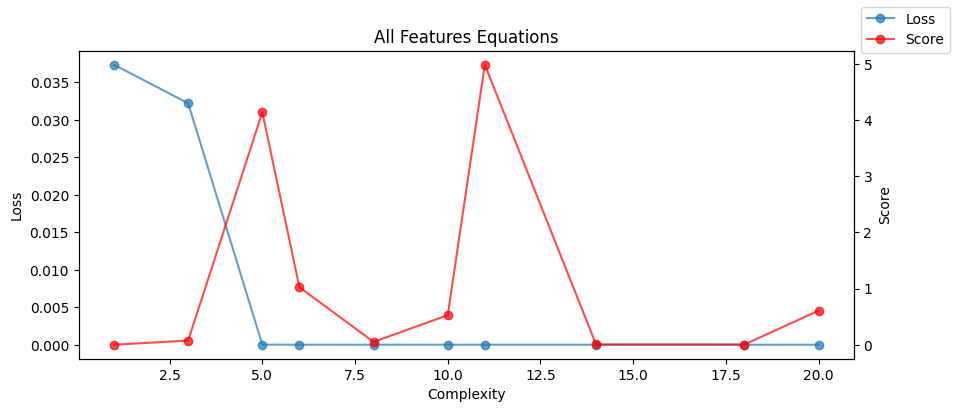

In [47]:
fig, ax = plt.subplots(figsize = (10,4))
ax.plot(fsTD.equations_['complexity'],fsTD.equations_['loss'],'-o',alpha=0.7, label = "Loss")
ax.set_title("All Features Equations")
axT = ax.twinx()
axT.plot(fsTD.equations_['complexity'],fsTD.equations_['score'],'-o',c='r',alpha=0.7, label = "Score")
fig.legend()
ax.set_xlabel("Complexity"); ax.set_ylabel("Loss"); axT.set_ylabel("Score")
fig.tight_layout; plt.show()

### No need to repeat the process with N_C. We have all the feature sets we need

# Model Comparison

In [48]:
def Null_Model_Errors(true,mean):
    errs = np.zeros(true.shape)
    for i in range(true.shape[1]):
        for j in range(true.shape[2]):
            errs[:,i,j] = np.sqrt(np.square(mean-true[:,i,j]))
    return errs

In [49]:
def get_errors(true, preds, agg="None"):
    rows,cols,points = true.shape[0],true.shape[1],true.shape[2]
    rmse = np.sqrt(np.square(preds-true))
    if agg=="None": return rmse
    if agg=="Time": return rmse.mean(axis=(1,2))
    if agg=="Space": return rmse.mean(axis=0)
    else: return "Invalid Agg"

In [50]:
def predict(equation,dataframes):
    rows = len(dataframes); cols = len(dataframes[0]); points = len(dataframes[0][0])
    preds = np.zeros((points,rows,cols))
    for i in range(rows):
        for df in dataframes[i]:
            ii = int(df['i'][0]); jj = int(df['j'][0])
            preds[:,ii,jj] = np.array(df.eval(equation))
    return preds

In [51]:
N_N = N_N[:,:250,:,:]
time = np.arange(N_N.shape[1]) * 0.1
dNdt = hlp.cubic_splines(N_N[1],time); dNovN = dNdt / N_N[1]
true = dNovN
mean = np.mean(dNovN,axis=(1,2))

In [57]:
model_list = [fs1MB,fs1E,fs2MB,fs2E,fs3MB,fs3E,fs4MB,fs4E,fsTDMB,fsTDE,fsTDHP]

model_errors = {"MB1":[0],"BS1":[1],"MB2":[2],"BS2":[3],"MB3":[4],"BS3":[5],
                "MB4":[6],"BS4":[7],"MBTD":[8],"BSTD":[9],"HPTD":[10]}

for model in model_errors:
    preds = predict(model_list[model_errors[model][0]]['equation'],VIN_DF[0][1])
    model_errors[model].append(get_errors(true,preds,agg="Space"))

null_error = Null_Model_Errors(true,mean).mean(axis=0)

In [58]:
BSEQs = pd.concat([fs1E,fs2E,fs3E,fs4E,fsTDE],axis=1).T; BSEQs.reset_index(drop=True, inplace= True)
MBEQs = pd.concat([fs1MB,fs2MB,fs3MB,fs4MB,fsTDMB],axis=1).T; 
MBEQs.reset_index(drop=True, inplace= True)
BSEQs["Type"] = "Best Score"
MBEQs["Type"] = "Model Best"
HPEQ = fsTDHP; HPEQ["Type"] = "Hand Pick"
BEQs = pd.concat([BSEQs,MBEQs],axis=0); BEQs.reset_index(drop=True, inplace=True); 
BEQs = pd.concat([BEQs,pd.DataFrame(HPEQ).T],axis=0); BEQs.reset_index(drop=True, inplace=True)



/run/nvme/job_17140036/tmp/ipykernel_1356175/1661156275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPEQ = fsTDHP; HPEQ["Type"] = "Hand Pick"
/run/nvme/job_17140036/tmp/ipykernel_1356175/1661156275.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HPEQ = fsTDHP; HPEQ["Type"] = "Hand Pick"


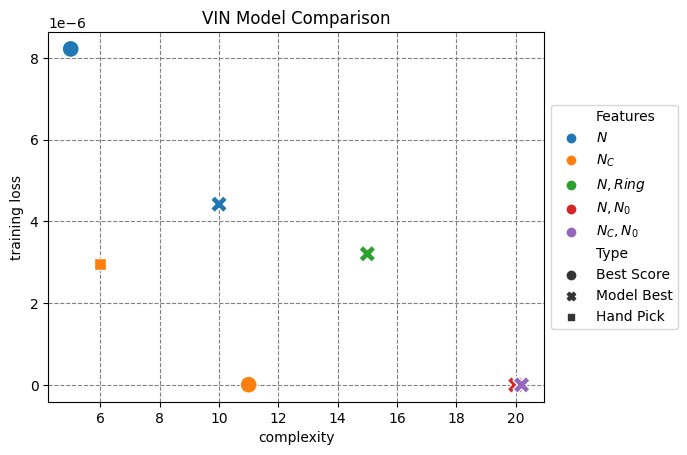

In [71]:
fig, ax = plt.subplots()
inds = [0,4,5,6,7,9,10]
BEQSP = BEQs.iloc[inds]
noise = np.zeros(len(BEQSP)); noise[5] = 0.2
sns.scatterplot(data=BEQSP, x=BEQSP['complexity']+noise, y='loss', hue='Features', style='Type', s=150, ax=ax)
sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left')
ax.set_ylabel("training loss")
ax.set_axisbelow(True)
ax.grid(color='gray', linestyle='dashed')
ax.set_title("VIN Model Comparison")
plt.show()

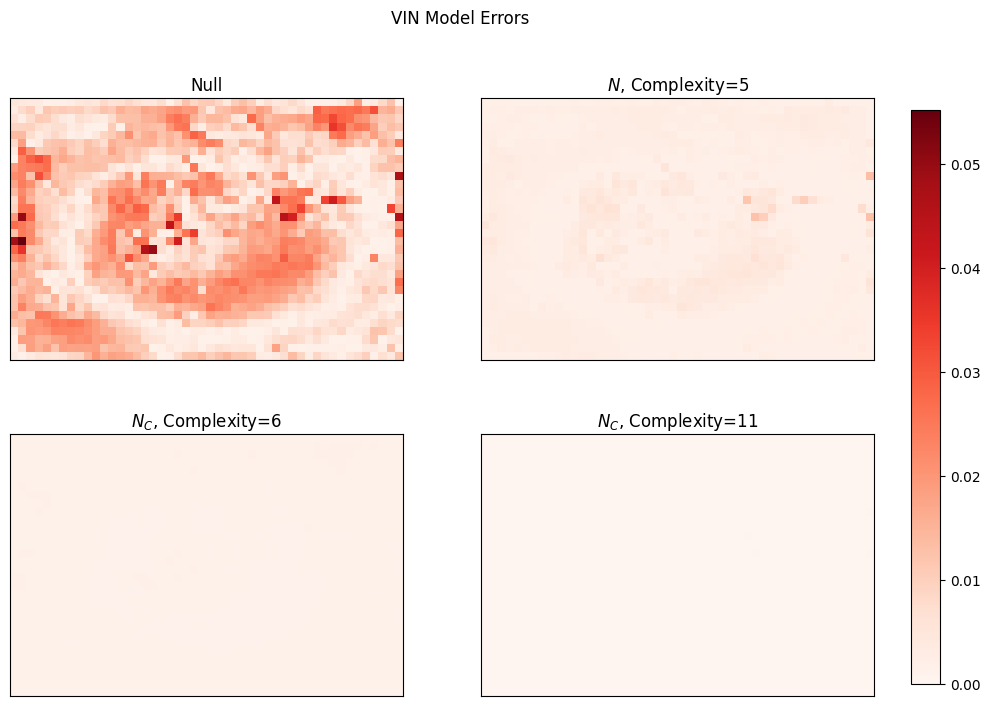

In [62]:
fig, axs = plt.subplots(2,2,figsize=(12,8))

cmax = np.max(null_error)

p1 = axs[0,0].imshow(null_error, cmap = 'Reds', vmin=0,vmax=cmax); axs[0,0].set_title(r"Null")
p2 = axs[0,1].imshow(model_errors['BS1'][1], cmap = 'Reds', vmin=0,vmax=cmax); axs[0,1].set_title(r"$N$, Complexity=5")
p3 = axs[1,0].imshow(model_errors['HPTD'][1], cmap = 'Reds', vmin=0,vmax=cmax); axs[1,0].set_title(r"$N_C$, Complexity=6")
p3 = axs[1,1].imshow(model_errors['BSTD'][1], cmap = 'Reds', vmin=0,vmax=cmax); axs[1,1].set_title(r"$N_C$, Complexity=11")

for ax in axs.ravel():
    ax.set_xticks([]);ax.set_yticks([])
    
fig.colorbar(p1,ax=axs,fraction=0.046*.67, pad=0.04)
fig.suptitle("VIN Model Errors")
plt.show()